## Create different 3D magma grid file (lon, lat, dep, dvp, dvs, rho)

### Type 1 constant magma  
middle of the circle : 25.21, 121.623 , 30.  
modify vp_per vs_per

13534


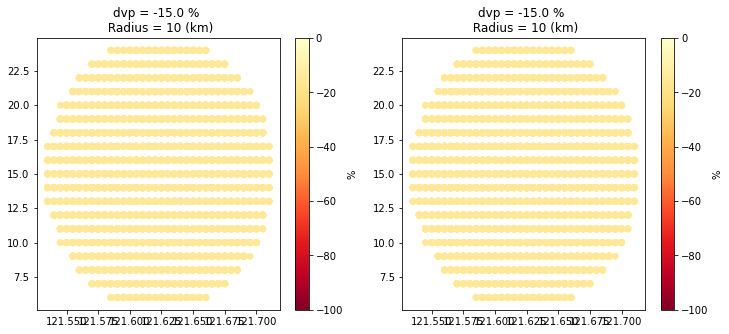

In [3]:
import numpy as np
import matplotlib.pyplot as plt


num = 100
#theta_num = np.arange(0,111,1) #theta (km)
lat_num = np.arange(25, 25.37, 0.005)*111
lon_num = np.arange(121.35, 121.9, 0.005)*111
dep_num = np.arange(0,50,1)  #depth (km)

mag_dep = 15
vp_per  = -15.
vs_per = -15.
radius = 10
circle_lat, circle_lon, circle_dep = 25.21*111, 121.623*111, mag_dep

x_lon = []
y_lat = []
z_dep = []
dvp = []
dvs = []

#lat_num = [25.2*111]
for lat in lat_num:
    for lon in lon_num:
        for dep in dep_num:
            #plt.plot(theta, dep,'b.')
            dis = ((circle_lat - lat)**2+(circle_lon - lon)**2+(circle_dep - dep)**2)**(0.5)

            #print(dis)
            z = 0.
            if (dis < radius ):
                tmp_p = vp_per
                tmp_s = vs_per
                #cos_tap = 0.5 * (1 + np.cos(2*np.pi*dis/(radius*2)))
                #tmp_p = vp_per * cos_tap
                #tmp_s = vs_per * cos_tap

                x_lon.append(lon/111)
                y_lat.append(lat/111)
                z_dep.append(dep)
                dvp.append(tmp_p)
                dvs.append(tmp_s)
                #print(dis, cos_tap,tmp_s)

print(len(dvp))
fp = open('r_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, vp_per, vs_per),'w')
#fp = open('rcos_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, vp_per, vs_per),'w')

#fp.write('lon lat dep dvp dvs rho\n')
for i in range(len(dvp)):
    #fp.write(("%6.1f %6.2f %6.2f %6.2f 0.0\n")%(6371.-y_dep[i], x_the[i]/111., dv[i], dv[i]))
    fp.write('%6.2f  %5.2f  %4.1f %6.2f  %6.2f  0.0\n'%(x_lon[i], y_lat[i], z_dep[i],dvp[i],dvs[i]))
fp.close()

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_lon ,z_dep,c=dvp,cmap='YlOrRd_r',vmin=-100,vmax=0)
plt.colorbar(label='%')
plt.title('dvp = %s %% \n Radius = %s (km)'%(vp_per, radius))
#plt.axis('scaled')

plt.subplot(1,2,2)
plt.scatter(x_lon ,z_dep,c=dvs,cmap='YlOrRd_r',vmin=-100,vmax=0)
plt.colorbar(label='%')
plt.title('dvp = %s %% \n Radius = %s (km)'%(vs_per, radius))
#plt.axis('scaled')


plt.show()

### 2. cosine taper

vp = -19% ; vs = -33%  
middle of the circle : 25.21, 121.623 , 30.  
2D plot may not clearly show dvp inside magma!

13534


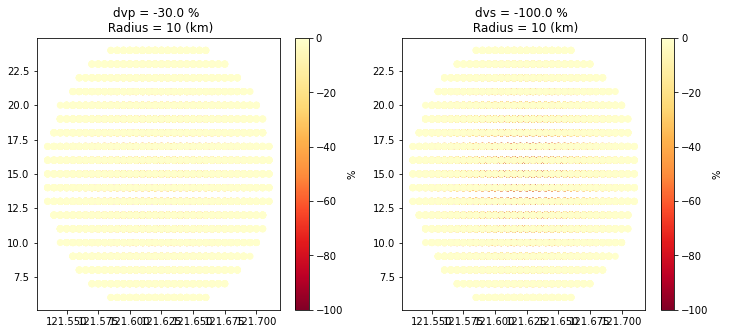

In [1]:
import numpy as np
import matplotlib.pyplot as plt


num = 100
#theta_num = np.arange(0,111,1) #theta (km)
lat_num = np.arange(25, 25.37, 0.005)*111
lon_num = np.arange(121.35, 121.9, 0.005)*111
dep_num = np.arange(0,50,1)  #depth (km)

mag_dep = 15
vp_per  = -30.
vs_per = -100.
radius = 10
circle_lat, circle_lon, circle_dep = 25.21*111, 121.623*111, mag_dep

x_lon = []
y_lat = []
z_dep = []
dvp = []
dvs = []

#lat_num = [25.2*111]
for lat in lat_num:
    for lon in lon_num:
        for dep in dep_num:
            #plt.plot(theta, dep,'b.')
            dis = ((circle_lat - lat)**2+(circle_lon - lon)**2+(circle_dep - dep)**2)**(0.5)

            #print(dis)
            z = 0.
            if (dis < radius ):
                #tmp_p = vp_per
                #tmp_s = vs_per
                cos_tap = 0.5 * (1 + np.cos(2*np.pi*dis/(radius*2)))
                tmp_p = vp_per * cos_tap
                tmp_s = vs_per * cos_tap

                x_lon.append(lon/111)
                y_lat.append(lat/111)
                z_dep.append(dep)
                dvp.append(tmp_p)
                dvs.append(tmp_s)
                #print(dis, cos_tap,tmp_s)

print(len(dvp))
#fp = open('r_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, vp_per, vs_per),'w')
fp = open('rcos_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, vp_per, vs_per),'w')

#fp.write('lon lat dep dvp dvs rho\n')
for i in range(len(dvp)):
    fp.write('%6.2f  %5.2f  %4.1f %6.2f  %6.2f  0.0\n'%(x_lon[i], y_lat[i], z_dep[i],dvp[i],dvs[i]))
fp.close()

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_lon ,z_dep,c=dvp,cmap='YlOrRd_r',vmin=-100,vmax=0)
plt.colorbar(label='%')
plt.title('dvp = %s %% \n Radius = %s (km)'%(vp_per, radius))
#plt.axis('scaled')

plt.subplot(1,2,2)
plt.scatter(x_lon ,z_dep,c=dvs, cmap='YlOrRd_r',vmin=-100,vmax=0)
plt.colorbar(label='%')
plt.title('dvs = %s %% \n Radius = %s (km)'%(vs_per, radius))
#plt.axis('scaled')

#plt.savefig('dvp_%s_dvs_%s.png'%(vp_per,vs_per))
plt.show()